In [4]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

def plota_3d(pontos, title=""):
    x_coords = [p[0] for p in pontos]
    y_coords = [p[1] for p in pontos]
    z_coords = [p[2] for p in pontos]

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=45, azim=45)
    ax.scatter(x_coords, y_coords, z_coords, c='#0073CF')
    ax.set_title(title)
    plt.show()

def plota_2d(pontos, title=""):
    x_coords = [p[0] for p in pontos]
    y_coords = [p[1] for p in pontos]

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.scatter(x_coords, y_coords, c='#0073CF')
    ax.set_title(title)
    plt.show()

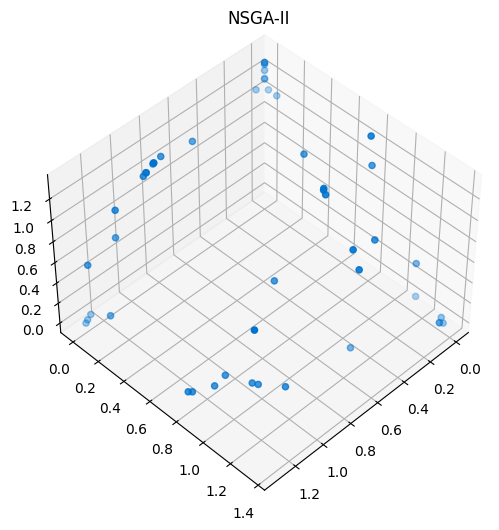

In [5]:
from src.problems import DTLZ
from src.MOEAs import NSGAII
from run import get_mutation, get_crossover, get_selection, get_sparsity

problem = DTLZ.DTLZ2(numberOfObjectives=3, k=12)
nsga = NSGAII.NSGAII(problem, 10_000, 200, 200, None, None, None, None)
nsga.mutation = get_mutation("Polynomial", "resources/args_samples/Polynomial_args.json")
nsga.crossover = get_crossover("SBX", "resources/args_samples/SBX_args.json")
nsga.selection = get_selection("Binary")
nsga.sparsity = get_sparsity("CrowdingDistance")

nsga.execute()
plota_3d([a.objectives for a in nsga.paretoFront.getFront(0)], "NSGA-II")

In [7]:
def open_file(file_name, plot):
    with open(f'results/{file_name}/F0', 'r') as file:
        content = file.read()
    res = eval(content)
    plot(res,file_name)

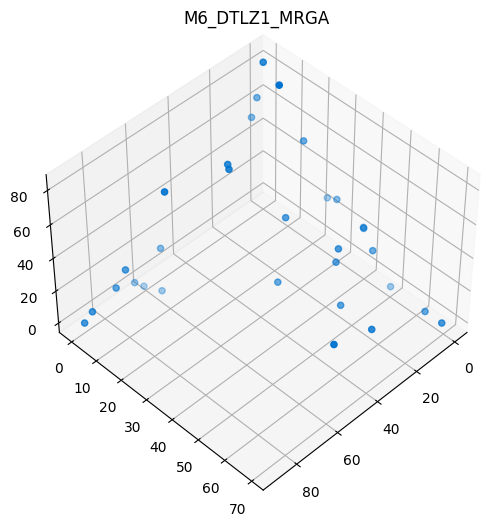

In [12]:
open_file('M6_DTLZ1_MRGA', plota_3d)

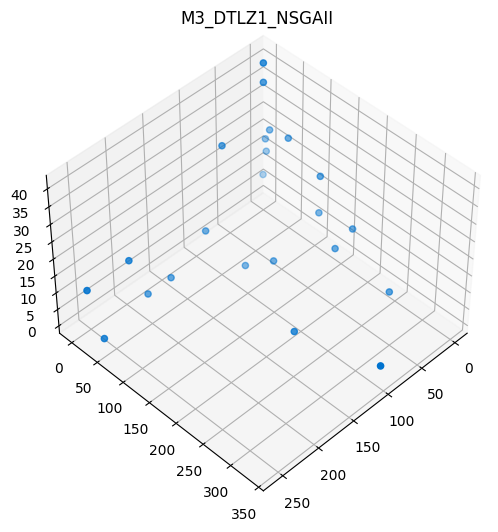

In [9]:
open_file('M3_DTLZ1_NSGAII', plota_3d)

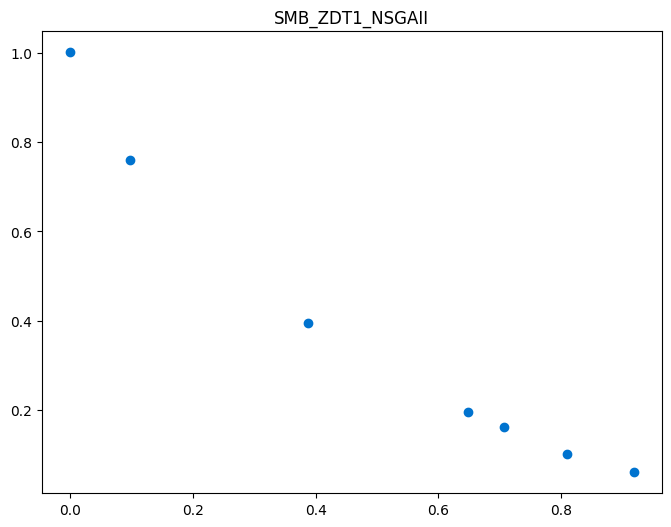

In [10]:
open_file('SMB_ZDT1_NSGAII', plota_2d)

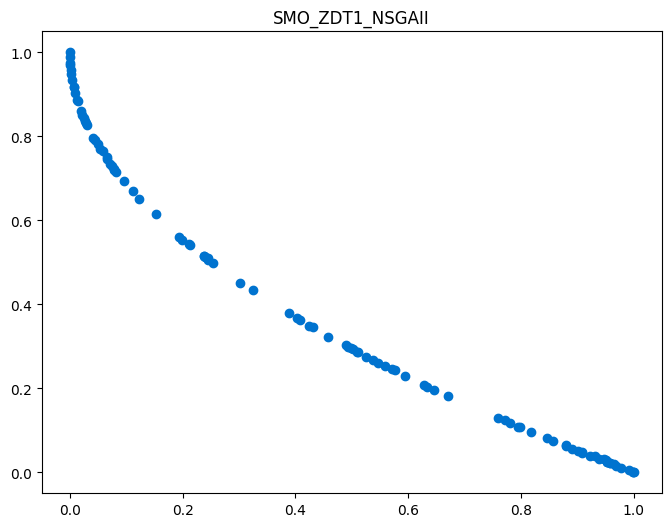

In [11]:
open_file('SMO_ZDT1_NSGAII', plota_2d)

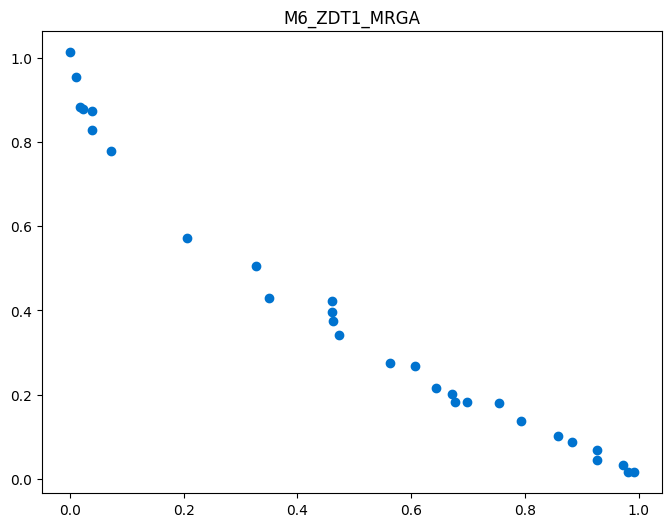

In [13]:
open_file("M6_ZDT1_MRGA", plota_2d)